# T.P. NUMÉRO 3
## Par Roussel Desmond Nzoyem

In [1]:
%reset -f

In [2]:
import numpy as np
import numpy.linalg as npalg

from scipy.sparse import csr_matrix
from scipy.sparse.linalg import splu

import matplotlib.pyplot as plt

In [3]:
plt.style.use("seaborn")

L'objectif de ce travail est de contrôler la température sur l'extrémité droite d'une barre unidimensionnelle. L'état $y$ et la commande $u$ correspondante résolvent, pour $(t,x) \in [0,T]\times[0,L]$, l'équation de la chaleur $(\mathcal{S})$ suivante:
\begin{align*}
\frac{\partial y_u}{\partial t} (t,x) - \frac{\partial^2 y_u}{\partial x^2} (t,x) &= 0 \\
y_u(0,x) &= 0 \\
y_u(t,0) &= 0  \\
\frac{\partial y_u}{\partial x} (t,L) &= u(t) 
\end{align*} 

Sans contrainte particulière sur le contrôle $u$ (vu que $\mathcal{U}_{ad} = L^2(]0,T)$), on s'intéresse au problème $(\mathcal{P}): \inf_{u \in \mathcal{U}_{ad}} J(u)$ i.e on cherche à minimiser la fonctionnelle suivante:
$$
J(u) = \frac{1}{2} \int_0^T (y_u(t,L) - z_d(t))^2 \, dt + \frac{\varepsilon}{2} \int_0^T u(t)^2 dt
$$

Le choix de ce critère correspond au besoin de porter la température sur le bord droit de la barre vers le profile $z_d$ (attache aux données), tout en minimisant le coût du contrôle (régularisation). 

## 1. Différentiation de J

*Dans toute la suite, les dépendances en $t$ et $x$ sont négligées au profit de la dépendance en $u$. Ainsi, l'état $y_u(t,x)$ sera noté simplement $y$, $y(u)$, ou bien $y(u)(t,x)$ en cas de nécessité. Toujours afin de simplifier les notations, l'ensemble des contrôles admissibles $\mathcal{U}_{ad} = L^2(]0,T[)$ sera simplement noté $L^2$*.

### 1.1 Montrons que $J$ est différentiable en $u$


Si $J$ est différentiable en $u$, alors on peut écrire, pour $h \in \mathcal{U}_{ad}$ et $\eta > 0 $

\begin{align*}
DJ(u)\cdot h &= \lim_{\eta \rightarrow 0}{ \frac{J(u+\eta  h) - J(u)}{\eta }}  \\
&= \frac{dJ(u+\eta h)}{d\eta} \bigg\rvert_{\eta = 0} \\
&= \frac{1}{2} \int_0^T \frac{d}{d\eta} (y(u+\eta h)(\cdot,L) - z_d)^2\,dt + \frac{\varepsilon}{2} \int_0^T \frac{d}{d\eta} (u+\eta h)^2\,dt  \bigg\rvert_{\eta=0}  \\
&= \int_0^T y'(h)(\cdot,L) (y(u+\eta h)(\cdot,L) - z_d)\,dt + \varepsilon \int_0^T h (u+\eta h)\,dt  \bigg\rvert_{\eta=0} \\
&= \int_0^T y'(h)(\cdot,L) \left[y(u)(\cdot,L) - z_d\right]\,dt + \varepsilon \int_0^T h u\,dt
\end{align*}
où la dérivée directionnelle de $y$ dans la direction $h$ est donnée par (expression indépendante de $\eta$) $$y'(h) =  \lim_{\eta \rightarrow 0}{ \frac{y(u+\eta  h) - y(u)}{\eta }}$$

---

#### Montrons la continuité de $y'(h)$
Remarquons que $y'(h)$ vérifie entre autres les équations suivantes: 
\begin{align*}
\frac{\partial}{\partial t}y'(h) - \frac{\partial^2}{\partial x^2}y'(h) &= \frac{\partial}{\partial t} \frac{y(u+\eta h)- y(u)}{\eta} - \frac{\partial^2}{\partial x^2} \frac{y(u+\eta h)-y(u)}{\eta} = 0 \\
\frac{\partial}{\partial x}y'(h)(\cdot,L) &= \frac{\partial}{\partial x} \frac{y(u+\eta h)(\cdot,L)-y(u)(\cdot,L)}{\eta} = \frac{u+\eta h- u}{\eta} = h
\end{align*} 
et donc $y'(h)$ est solution du système $(\mathcal{S}')$ ci-bas:
\begin{align*}
\frac{\partial y'(h)}{\partial t}(\cdot,\cdot) - \frac{\partial^2 y'(h)}{\partial x^2}(\cdot,\cdot) &= 0 \\
y'(h)(0,\cdot) &= 0 \\
y'(h)(\cdot,0) &= 0  \\
\frac{\partial y'(h)}{\partial x}(\cdot,L) & = h
\end{align*} 
En posant $v = h+u$, on remarque que le vecteur $y(v)-y(u)$ résout le même système $(\mathcal{S}')$. Et on peut montrer l'unicité de la solution faible pour ce système en introduisant, sur $V = \{v \in H^1(]0,L[) \text{ t.q. } v(0)=0\}$, une forme linéaire continue $l$ et une forme bilinéaire symétrique, continue et coercive $a$, et en concluant à l'aide du théorème abstrait vu en cours. Le même théorème nous donne la continuité de la solution par rapport aux membres de droite dans les équations. On en déduit que $y'(h) = y(v)-y(u)$, et que $y'(h)$ est continue par rapport à $h$. 


#### Montrons la linéarité de $y'(h)$
La linéarité de $y'(u)$ s'obtient en remarquant comme précédemment que pour $h_1, h_2 \in \mathcal{U}_{ad}$ et $\beta \in \mathbb{R}$, $y'(h_1 + \beta h_2)$ et $y'(h_1) + \beta y'(h_2)$ sont solutions du même système d'EDP. 

_En remarquant que le système $(\mathcal{S}')$ résolu par $y'(h)$ est très similaire au système $(\mathcal{S})$ résolu par $y(u)$, on peut aussi montrer que $y(u)$ est continue et linéaire par rapport à $u$, en employant la même démarche que celle emplotée pour $y'(h)$._

---

$DJ(u)\cdot h$ est donc linéaire par rapport à $h$ comme somme de fonctions linéaires. On montre aussi que $DJ(u)\cdot h$ est continue à travers le même argument, ou en appliquant l'inégalité de Cauchy-Schwarz. Autrement dit, $\exists \, C_1 >0$ tel que

\begin{align*}
\vert DJ(u)\cdot h \vert &= \bigg\rvert \int_0^T y'(h)(\cdot,L) \left[y(u)(\cdot,L) - z_d\right]\,dt + \varepsilon \int_0^T h u\,dt \bigg\rvert \\
&\leq \Vert y'(h)(\cdot,L) \Vert_{L^2} \Vert y(u)(\cdot,L) - z_d \Vert_{L^2} + \varepsilon \Vert h \Vert_{L^2} \Vert u \Vert_{L^2} &&\qquad \text{par C-S} \\
&\leq C_1 \Vert h \Vert_{L^2} &&\qquad \text{par continuité de $y'(\cdot)$}
\end{align*}
En se rappelant que $y'(h) = y(v)-y(u)$, $\exists \, C_2 >0$ tel que
\begin{align*}
\frac{\vert J(u+h) - J(u) - DJ(u)\cdot h \vert}{\Vert h \Vert_{L^2} } &= \frac{\vert J(v) - J(u) - DJ(u)\cdot h \vert}{\Vert h \Vert_{L^2} } \\
&= \frac{ \big\rvert \Vert y(v)(\cdot,L)-z_d \Vert_{L^2} + \Vert v \Vert_{L^2} - \Vert y(u)(\cdot,L)-z_d \Vert_{L^2} - \Vert u \Vert_{L^2} - \left\langle y(v)(\cdot,L)-z_d, y(u)(\cdot,L)-z_d \right\rangle_{L^2} - \left\langle v-u, u \right\rangle_{L^2} \big\rvert}{\Vert h \Vert_{L^2}} \\
&= \frac{ \big\rvert \left\langle y(v)(\cdot,L)-y(u)(\cdot,L), y(v)(\cdot,L)-z_d \right\rangle_{L^2} - \left\langle v-u, v \right\rangle_{L^2} \big\rvert}{\Vert h \Vert_{L^2}} \\
&\leq  \frac{ C_2 \Vert h \Vert^2_{L^2}}{\Vert h \Vert_{L^2}} \qquad \text{par linéarité et continuité de $v \mapsto y(v)=y(h+u)$}
\end{align*}
La différentiabilité de $J$ en $u$ en découle, car
$$
\lim_{\Vert h \Vert_{L^2} \rightarrow 0} \frac{\vert J(u+h) - J(u) - DJ(u)\cdot h \vert}{\Vert h \Vert_{L^2} } = 0 
$$


### 1.2 Calcul du gradient de $J$ en $u$


Exprimons explicitement chacun des termes de la différentielle $DJ(u)\cdot h$ en fonction de $h$. Pour cela, introduisons l'adjoint $p:(t,x) \mapsto p_u(t,x)$. Multiplions l'équation de la chaleur $(\mathcal{S}')$ (résolue par $y'(h)$) par $p$ et intégrons par parties. On a:
\begin{align*}
	&\frac{\partial y'(h)}{\partial t} - \frac{\partial^2 y'(h)}{\partial x^2} = 0 \\
	\Longrightarrow &\int_0^T \int_0^L \left( \frac{\partial y'(h)}{\partial t} - \frac{\partial^2 y'(h)}{\partial x^2} \right) p = 0 \\
	\Longrightarrow &\int_0^T \left( \int_0^L \frac{\partial y'(h)}{\partial t} p \right) - \int_0^T \left( \int_0^L \frac{\partial^2 y'(h)}{\partial x^2}p \right) = 0 \\
	\Longrightarrow &- \int_0^L \int_0^T \frac{\partial p}{\partial t} y'(h) + \int_0^L \left[ y'(h)p \right]_0^T- \int_0^T \int_0^L \frac{\partial y'(h)}{\partial x} \frac{\partial p}{\partial x} - \int_0^T \left[ \frac{\partial y'(h)}{\partial x}p \right]_0^L  = 0 \\
\end{align*}

- Vu que $y'(h)(0, \cdot) = y(v)(0, \cdot)- y(u)(0, \cdot) = 0$, le deuxième terme de la somme de gauche $\int_0^L \left[ y'(h)p \right]_0^T $ s'annule en prenant $p(T, \cdot) = 0$. 

- En prenant $p(\cdot, 0) = 0$, le quatrième terme donne $\int_0^T \left[ \frac{\partial y'(h)}{\partial x}p \right]_0^L = \int_0^T \frac{\partial y'(h)}{\partial x}p\big\rvert_{x=L} = \int_0^T h(\cdot)p(\cdot,L)$, de part le fait que $\frac{\partial y'(h)}{\partial x}(\cdot,L) = h$.

Effectuons ensuite une seconde intégration par parties sur le troisième terme dans la somme de gauche de l'équation ci-haut (terme du milieu ci-bas), l'équation devient
\begin{align*}
	&- \int_0^L \int_0^T \frac{\partial p}{\partial t} y'(h) -\int_0^T \int_0^L \frac{\partial y'(h)}{\partial x} \frac{\partial p}{\partial x} - \int_0^T h(\cdot)p(\cdot,L) = 0 \\
	\Longrightarrow &- \int_0^L \int_0^T \frac{\partial p}{\partial t} y'(h) - \int_0^T \int_0^L y'(h) \frac{\partial^2 p}{\partial x^2} + \int_0^T \left[ \frac{\partial p}{\partial x} y'(h)\right]_0^L - \int_0^T h(\cdot)p(\cdot,L) = 0 \\
	\Longrightarrow &\int_0^L \int_0^T \left(-\frac{\partial p}{\partial t} - \frac{\partial^2 p}{\partial x^2} \right) y'(h) + \int_0^T \frac{\partial p}{\partial x}(\cdot,L) y'(h)(\cdot,L) - \int_0^T h(\cdot)p(\cdot,L) = 0 \\
\end{align*}
En posant
\begin{align*}
	-\frac{\partial p}{\partial t} - \frac{\partial^2 p}{\partial x^2} = 0 \qquad \text{et} \qquad
	\frac{\partial p}{\partial x}(\cdot,L) = y(u)(\cdot,L) - z_d(\cdot)
\end{align*}
on obtient 
$$
\int_0^T y'(h)(\cdot,L) \left( y(u)(\cdot,L) - z_d(\cdot) \right) = \int_0^T h(\cdot)p(\cdot,L)
$$
qu'on remplace immédiatement dans l'expression de $DJ(u)\cdot h$ pour obtenir

\begin{align*}
DJ(u)\cdot h &=  \int_0^T y'(h)(\cdot,L) (y(u)(\cdot,L) - z_d(\cdot))\,dt + \varepsilon \int_0^T h u\,dt \\
&= \int_0^T h(\cdot)p(\cdot,L)\,dt + \varepsilon \int_0^T h(\cdot) u(\cdot)\,dt \\
&= \left\langle  p(\cdot,L) + \varepsilon u(\cdot),\, h(\cdot)  \right\rangle_{L^2(]0,T[)}
\end{align*}
Nous avons donc montré que le gradient de $J$ en $u$ vaut 
$$
\nabla J(u) = p(\cdot,L) + \varepsilon u(\cdot)
$$
Ceci en considérant l'état adjoint défini pour $(t,x) \in [0,T]\times[0,L]$, par l’équation de la chaleur rétrograde $(\mathcal{S}'')$
\begin{align*}
	\frac{\partial p}{\partial t} (t,x) + \frac{\partial^2 p}{\partial x^2} (t,x) &= 0 \\
	p(T,x) &= 0 \\
	p(t,0) &= 0  \\
	\frac{\partial p}{\partial x} (t,L) &= y(u)(t,L) - z_d(t)
\end{align*} 

## 2. Résolution de l'équation de chaleur

### 2.1 Description de la méthode
On rappelle que $y$ résous l'équation de la chaleur $(\mathcal{P})$ suivante:
\begin{align*}
\frac{\partial y}{\partial t} (t,x) - \frac{\partial^2 y}{\partial x^2} (t,x) &= 0 \\
y(0,x) &= 0 \\
y(t,0) &= 0  \\
\frac{\partial y}{\partial x} (t,L) &= u(t) 
\end{align*} 

La méthode adoptée repose sur une discrétisation de l'espace $[0,L]$ en $N_x+1$ points, et le temps $[0,T]$ en $N_t+1$ points uniformément espacés, de façon a avoir, pour $ i \in [\![ 0, N_x ]\!]$ et $ k \in [\![ 0, N_t ]\!]$, $x_i = i\Delta x$ et $t^k = k\Delta t$. On pose par la suite $y_i^k \approx y(x_i, t^k)$.

L'approximation de type différences finies centrées en espace permet d'écrire
$$
\frac{\partial^2 y}{\partial x^2} (x_i, t^k) \approx \frac{y^k_{i+1}- y^k_{i} + y^k_{i-1}}{\Delta x^2}
$$

L'approximation de type différences finies décentrée en amont en temps permet d'écrire
$$
\frac{\partial y}{\partial t} (x_i, t^k) \approx \frac{y_i^{k} - y_i^{k-1}}{\Delta t}
$$

On en déduit le schéma numérique implicite en temps (d'après $(\mathcal{P})$: 
$$
\frac{y_i^{k} - y_i^{k-1}}{\Delta t} + \frac{y^k_{i+1}- y^k_{i} + y^k_{i-1}}{\Delta x^2} = 0 \qquad i \in [\![ 1, N_x-1]\!]
$$
En introduisant les conditions au bord gauche (Dirichlet homogène) et au bord droit (Neumann non-homogène), on montre que l'approximation de l'état du système au temps $t^k$ vérifie 
$$
\left( \mathbb{I} + \frac{\Delta t}{\Delta x^2} A \right) y^k = \frac{\Delta t}{\Delta x} b^k + y^{k-1}, \qquad k \in [\![ 1, N_t]\!]
$$
où
$$
y^k = \begin{bmatrix} y_1^k \\ \vdots \\ y_i^k \\ \vdots \\  y_{N_x}^k \end{bmatrix}, \qquad
A = \begin{bmatrix} 2 & -1 & 0 & \ldots & 0 \\ -1 & 2 & \ddots & \ddots & \vdots \\ 0 & \ddots & \ddots & \ddots & 0 \\ \vdots & \ddots & \ddots & 2 & -1 \\ 0 & \ldots & 0 & -1 & 1 \end{bmatrix}, \qquad
b^k = \begin{bmatrix} 0 \\ \vdots \\ 0 \\ \vdots \\  u(t^k) \end{bmatrix}
$$ 
et l'état initial est donné par 
$$
y^0 = \begin{bmatrix} 0 \\ \vdots \\ 0 \\ \vdots \\  0 \end{bmatrix}
$$

### 2.2 Programmation de la méthode

En remarquant que la matrice $\mathbb{I} + \frac{\Delta t}{\Delta x^2} A$, est utilisée à chaque pas de temps, on décide de la décomposer sous forme $LU$ afin de gagner en temps de calcul.

In [4]:
## Construction de la matrice A
def buildA(Nx):
    diag = np.diag(2*np.ones(Nx))
    diag[Nx-1,Nx-1] = 1
    diagSup = np.diag(-np.ones(Nx-1), 1)
    diagInf = np.diag(-np.ones(Nx-1), -1)
    return csr_matrix(diag + diagSup + diagInf)

In [5]:
## Fonction de résolution de l'équation de la chaleur
def solveStateProblem(Nx, L, Nt, T, u, y0=None):
    dx = L/Nx
    dt = T/Nt

    I = csr_matrix(np.diag(np.ones(Nx)))
    A = buildA(Nx)
    LU = splu(I + dt*A/(dx**2))     ## Décomposition LU

    if y0 is None:
        y0 = np.zeros(Nx+1)

    yList = np.empty((Nx+1, Nt+1))
    yList[:, 0] = y0
    b = np.zeros(Nx)

    y = y0.copy()
    for k in range(1, Nt+1):
        b[-1] = u[k]
        y[1:] = LU.solve(y[1:] + dt*b/dx)
        yList[:, k] = y

    return yList

In [6]:
## Fonction d'affichage de l'état
def plotState(yList, params, ax, plotEvol=True, title=None):
    Nx = params["Nx"]
    L = params["L"]
    Nt = params["Nt"]
    T = params["T"]

    x = np.linspace(0, L, Nx+1)
    t = np.linspace(0, T, Nt+1)

    if plotEvol:
        for k in range(0, Nt+1, Nt//10):
            if k==2*(Nt)/(Nt//10):
                ax.plot(x, yList[:, k], "m-", label="Temps intermediaires", alpha=(k+5)/Nt/4)
            else:
                ax.plot(x, yList[:, k], "m-", alpha=(k+5)/Nt/4)
    ax.plot(x, yList[:, -1], "m-", label="Temps final")

    ax.set_xlabel("$x$", fontsize="large")
    ax.set_ylabel("$y$", fontsize="large")
    if title is None:
        title = "État du système"
    ax.set_title(title, fontsize="x-large", y=1.02)
    ax.legend(fontsize="large");

Pour vérifier que la méthode fonctionne, on teste le schéma sur une barre de longueur $L=5$, et pour un horizon de temps $T=2$. Le flux de chaleur en $x=L$ sera constant.

In [7]:
## Parametres de base pour tester le schéma
Nx = 1000
L = 5
Nt = 50
T = 2
heatProblemParams = {"Nx":Nx,
                     "L":L,
                     "Nt":Nt,
                     "T":T,
                     "u":np.ones(Nt+1),
                     "y0":np.zeros(Nx+1)}

C:\Users\Roussel\miniconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


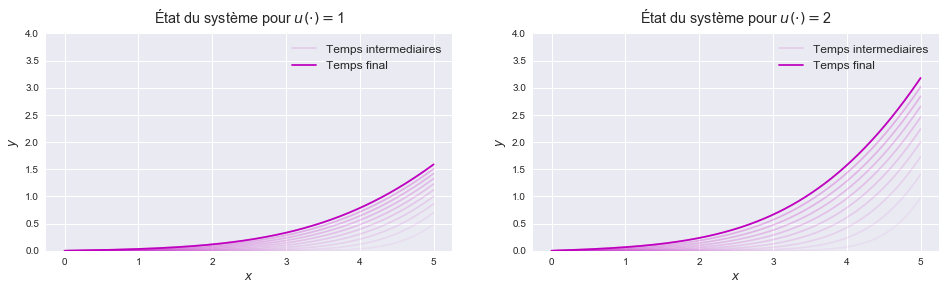

In [8]:
fig, ax = plt.subplots(1,2,figsize=(16,4))

heatProblemParams["u"] = np.ones(Nt+1)
yList = solveStateProblem(**heatProblemParams)
title = "État du système pour $u(\cdot)=$%0.0f"%heatProblemParams["u"][0]
plotState(yList, heatProblemParams, ax[0], True, title=title)

heatProblemParams["u"] = 2*np.ones(Nt+1)
yList = solveStateProblem(**heatProblemParams)
title = "État du système pour $u(\cdot)=$%0.0f"%heatProblemParams["u"][0]
plotState(yList, heatProblemParams, ax[1], True, title=title)

ax[0].set_ylim(0,4)
ax[1].set_ylim(0,4);

On constate effectivement qu'un flux de chaleur $u(\cdot)$ élevé entraîne un échauffement plus important du bord droit de la barre. On confirme aussi que la température sur le bord gauche reste nulle durant toute l'expérience. Les temps intermédiaires sur les figures (en traits transparents) permettent d'observer le départ de la solution de son état initial $y^0 = 0$ vers un état final (indiqué par le trait de forte opacité). 

## 3. Calcul du gradient de $J$ en $u$

### 3.1 Description de la méthode

Le calcul du gradient de $J$ se fait à travers la formule trouvée à la question 1.2
$$
\nabla J(u) = p(\cdot,L) + \varepsilon u(\cdot)
$$
On constate que son calcul nécessite le calcul au préalable de l'état adjoint $p$. Nous disposons de deux approches pour calculer l'adjoint $p$:

- Une première approche par inversion du temps (équation de la chaleur rétrograde)
- Une seconde approche par introduction d'une fonction $q(t,x) = p(T-t,x)$

### 3.2 Résolution du problème adjoint en inversant le temps

Nous avons montré à la question $1.2$ que $p$ résous l'équation de la chaleur rétrograde $(\mathcal{S}'')$
\begin{align*}
\frac{\partial p}{\partial t} (t,x) + \frac{\partial^2 p}{\partial x^2} (t,x) &= 0 \\
p(T,x) &= 0 \\
p(t,0) &= 0  \\
\frac{\partial p}{\partial x} (t,L) &= y(t,L) - z_d(t)
\end{align*} 

Comme précédemment, on décide d'employer une méthode de type différences finies centrées en espace et décentrées en amont en temps. En posant $t^n = T - n\Delta t$ et $p_i^n \approx p(x_i, t^n)$, on montre que l'approximation de l'adjoint du système au temps $t^n$ vérifie 
$$
\left( \mathbb{I} + \frac{\Delta t}{\Delta x^2} A \right) p^n = \frac{\Delta t}{\Delta x} c^n + p^{n+1}, \qquad n \in [\![ 0, N_t-1]\!]
$$
où
$$
p^n = \begin{bmatrix} p_1^n \\ \vdots \\ p_i^n \\ \vdots \\  p_{N_x}^n \end{bmatrix}, \qquad
A = \begin{bmatrix} 2 & -1 & 0 & \ldots & 0 \\ -1 & 2 & \ddots & \ddots & \vdots \\ 0 & \ddots & \ddots & \ddots & 0 \\ \vdots & \ddots & \ddots & 2 & -1 \\ 0 & \ldots & 0 & -1 & 1 \end{bmatrix}, \qquad
c^n = \begin{bmatrix} 0 \\ \vdots \\ 0 \\ \vdots \\  y^n_{N_x+1}- z_d(t^n) \end{bmatrix}
$$ 
et l'adjoint à l'état final est donné par 
$$
p^{N_t} = \begin{bmatrix} 0 \\ \vdots \\ 0 \\ \vdots \\  0 \end{bmatrix}
$$

In [9]:
## Fonction de résolution de l'état adjoint par inversion du temps
def solveAdjointProblem(Nx, L, Nt, T, u, zd, yList):
    dx = L/Nx
    dt = T/Nt
    
    I = csr_matrix(np.diag(np.ones(Nx)))
    A = buildA(Nx)
    LU = splu(I + dt*A/(dx**2))
    
    c = np.zeros(Nx)
    pf = np.zeros(Nx+1)

    pList = np.empty((Nx+1, Nt+1))
    pList[:, Nt] = pf

    p = pf.copy()
    for k in range(Nt-1, -1, -1):
        c[-1] = yList[Nx,k] - zd[k]
        p[1:] = LU.solve(p[1:] + dt*c/dx)
        pList[:, k] = p

    return pList

In [10]:
adjointProblemParams = {"zd":np.ones(Nt+1), "yList":yList}
adjointProblemParams.update(heatProblemParams)  ## Rajouter la parametres de l'état
adjointProblemParams.pop("y0")

print("Paramètress du problème retrograde:", list(adjointProblemParams.keys()))

pList = solveAdjointProblem(**adjointProblemParams)

Paramètress du problème retrograde: ['zd', 'yList', 'Nx', 'L', 'Nt', 'T', 'u']


In [11]:
## Fonction d'affichage de l'adjoint
def plotAdjoint(pList, params, ax, plotEvol=True, title=None, which="$p$"):
    Nx = params["Nx"]
    L = params["L"]
    Nt = params["Nt"]
    T = params["T"]

    x = np.linspace(0, L, Nx+1)
    t = np.linspace(0, T, Nt+1)
    
    if plotEvol:
        for k in range(0, Nt+1, Nt//10):
            if k==2*(Nt)/(Nt//10):
                ax.plot(x, pList[:, k], "g-", label="Temps intermediaires", alpha=(k+5)/Nt/2)
            else:
                ax.plot(x, pList[:, k], "g-", alpha=(k+5)/Nt/2)
    ax.plot(x, pList[:, -1], "g-", label="Temps final")

    ax.set_xlabel("$x$", fontsize="large")
    ax.set_ylabel(which, fontsize="large")
    if title is None:
        title = "Dynamique adjointe du système"
    ax.set_title(title, fontsize="x-large", y=1.02)
    ax.legend(fontsize="large");

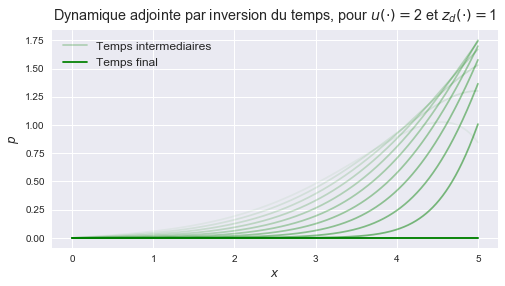

In [12]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

title="Dynamique adjointe par inversion du temps, pour $u(\cdot)=$%0.0f"%adjointProblemParams["u"][0]
title += " et $z_d(\cdot)=$%0.0f"%adjointProblemParams["zd"][0]
plotAdjoint(pList, adjointProblemParams, ax, True, title=title)

Cette figure permet bien d'observer que la valeur de l'adjoint au temps final est nulle.

### 3.3 Résolution du problème adjoint en utilisant la fonction $q$

L'introduction de la fonction  $q(t,x) = p(T-t,x)$ (pour $(t,x) \in [0,T]\times[0,L]$) permet de transformer l'équation de la chaleur retrograde en une équation de la chaleur directe. Pour montrer cela, on pose $t'= T-t \in [0,T]$ et on remarque 
\begin{align*}
\frac{\partial q}{\partial t} (t,x) - \frac{\partial^2 q}{\partial x^2} (t,x) &= - \left(\frac{\partial p}{\partial t} (t',x) + \frac{\partial^2 p}{\partial x^2} (t',x) \right) = 0 \\
q(0,x) &= p(T,x) = 0 \\
q(t,0) &= p(t',0) = 0  \\
\frac{\partial q}{\partial x} (t,L) &= \frac{\partial p}{\partial x} (t',L) = y(t',L) - z_d(t')
\end{align*} 
En posant $\tilde{y}(t,L) - \tilde{z_d}(t) = y(T-t,L) - z_d(T-t)$, on constate que $q$ résous le même système d'équations que l'état $y$ si on remplace le contrôle $u(\cdot)$ par la fonction $\tilde{y}(\cdot,L) - \tilde{z_d}(\cdot)$.


On pourra donc réutiliser la fonction `solveStateProblem` pour retrouver l'état adjoint du système. Après la résolution, on prendra soin d'inverser le contenu de $q$ pour avoir un adjoint $p$ dans le même sens que l'état $y$. Numériquement, cela s'effectue par `p = np.flip(q, axis=1)`.

In [13]:
## Définition des parametres
zdTilde = np.flip(np.ones(Nt+1))
yTilde = np.flip(yList[-1,:])

newAdjointProblemParams = {}
newAdjointProblemParams.update(heatProblemParams)

newAdjointProblemParams["u"] = yTilde-zdTilde

qList = solveStateProblem(**newAdjointProblemParams)

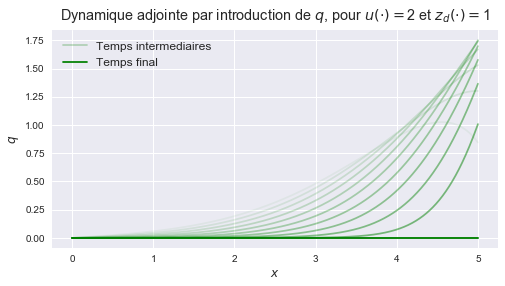

In [14]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

qListInv = np.flip(qList, axis=1)   ## Inversion pour obtenir le sens direct

title="Dynamique adjointe par introduction de $q$, pour $u(\cdot)=$%0.0f"%heatProblemParams["u"][0]
title += " et $z_d(\cdot)=$%0.0f"%zdTilde[0]

plotAdjoint(qListInv, newAdjointProblemParams, ax, True, title=title, which="$q$")

On constate que les deux méthodes de résolution du problème adjoint produisent les mêmes résultats. Dans la suite, nous utiliserons préférentiellement la deuxième.

### 3.3 Calcul effectif du gradient de $J$ en $u$

La formule du calcul du gradient ayant été définie plus haut:
$$
\nabla J(u) = p(\cdot,L) + \varepsilon u(\cdot)
$$

On définie donc la fonction ci-bas permettant de calculer le gradient de $J$ en $u$. 

In [89]:
def gradJ(pL, u, eps):
    return pL + eps*u

L'évaluation du critère $J$ sera importante pour la suite, implémentons donc une méthode de Runge-Kutta d'ordre 4 pour l'évaluer avec précision. On rappelle que le citère est donné par
$$
J(u) = \frac{1}{2} \int_0^T (y(t,L) - z_d(t))^2 \, dt + \frac{\varepsilon}{2} \int_0^T u(t)^2 dt
$$

Cette méthode de Runge-Kutta repose sur la connaissance des fonctions $y(\cdot,L)$, $z_d(\cdot)$, et $u(t)$ qui sont calculées (ou données) dans leur entièreté à l'avance.

In [90]:
### Fonction à intégrer
def func(yL, zd, u, eps):
    return 0.5*(yL-zd)**2 + 0.5*eps*(u)**2

### Calcul de J par RungeKutta4
def RungeKutta4(t, yL, zd, u, eps):
    Nt = yL.shape[0] - 1
    h = t[1] - t[0]
    
    J0 = 0
    JVals = np.empty((Nt+1))
    JVals[0] = J0
    
    J = J0
    for k in range(0, Nt):
        uk = u[k]
        zdk = zd[k]
        yLk = yL[k]

        k1 = func(yLk, zdk, uk, eps)
        k2 = func(yLk+h*k1/2, zdk+h*k1/2, uk+h*k1/2, eps)
        k3 = func(yLk+h*k2/2, zdk+h*k2/2, uk+h*k2/2, eps)
        k4 = func(yLk+h*k3, zdk+h*k3, uk+h*k3, eps)

        J += h * (k1+2*k2+2*k3+k4) / 6.0
        JVals[k+1] = J
    return JVals

### Fonction 'wrapper' pour évaluer J
def Jfunc(Nx, L, Nt, T, u, zd, yList, eps):
    t = np.linspace(0, T, Nt+1)
    yL = yList[-1, :]
    return RungeKutta4(t, yL, zd, u, eps)[-1]

In [91]:
JParams = {}
JParams.update(adjointProblemParams)
JParams["eps"] = 0.5

J = Jfunc(**JParams)
print("Valeur du critère: \n")
print("-- Par RungeKutta d'ordre 4:     ", J)

yL = yList[-1, :]
u = JParams["u"]
zd = JParams["zd"]
h = JParams["T"] / JParams["Nt"]
eps = JParams["eps"]
J = h*np.sum(0.5*(yL-zd)**2 + 0.5*eps*(u)**2)
print("-- Par la méthode des rectangles:", J)

Valeur du critère: 

-- Par RungeKutta d'ordre 4:      3.84852655147363
-- Par la méthode des rectangles: 3.905881962586319


Dans la suite, nous utiliserons la méthode de Runge-Kutta d'ordre 4 pour évaluer le critère, car elle est plus précise que la méthode des rectangles.

## 4. Résolution numérique du problème $(\mathcal{P})$

### 4.1 Description de la méthode

Ayant calculé le gradient de $J$ en $u$, on peut proposer une méthode de descente de gradient pour résoudre $(\mathcal{P})$. L'algorithme s'articule comme ceci:

---

- Choisir $u^0$
- Choisir une tolérance $tol$
- Poser k=0 
- Tank que $\frac{\vert J(u^{k+1})-J(u^{k}) \vert }{\vert J(u^{k}) \vert} \geq tol$ et $k \leq maxIter$ faire
    - Calculer l'état $y^{k}$ à travers un schéma de différences finies
    - Calculer l'adjoint $p^{k}$ à travers le même schéma
    - Calculer la direction de descente $d^k = -\nabla J(u^k)$
    - Rechercher le pas optimal $\rho^k$ en résolvant $\inf_{\rho \in R_+} f(\rho)$, où $f(\rho) = J(u^k+\rho d^k)$ (par une méthode de dichotomie)
    - Calculer $u^{k+1} = u^k + \rho^k d^k$ 
    - Poser k = k+1

---

### 4.2 Prgrammation de la méthode

In [92]:
## Calcul du pas optimal par une méthode de dichotomie
def computeRho(stateParams, criteriaParams, u, d, rhoMax, tolRho, maxIterRho):

    def f(rho):
        stateParams["u"] = u+rho*d
        yList = solveStateProblem(**stateParams)
        criteriaParams["yList"] = yList
        criteriaParams["u"] = u+rho*d
        return Jfunc(**criteriaParams)

    left = 0.0
    right = rhoMax

    fA = f(left)
    fB = f(right)

    iterCpt = 0
    while(abs(fA-fB)/abs(fA) >= tolRho and iterCpt<=maxIterRho):
        A = left + (right-left)/3.
        B = left + 2*(right-left)/3.

        fA = f(A)
        fB = f(B)

        if fA < fB:
            right = B
        elif fA > fB:
            left = A
        else:
            left = A
            right = B

        iterCpt+=1

    return 0.5*(left+right)

In [93]:
## Fonction de descente de gradient
def gradientDescent(Nx, L, Nt, T, u0, zd, eps, tol, maxIter, rhoMax, tolRho, maxIterRho, verbose=True):
    
    print("\n------------------ Gradient descent ongoing ... ------------------------- \n")

    stateParams = {"Nx":Nx, "L":L, "Nt":Nt, "T":T, "u":u0}

    adjointParams = {}
    zdTilde = np.flip(zd)
    adjointParams.update(stateParams)

    criteriaParams = {}
    criteriaParams.update(adjointParams)
    criteriaParams["eps"] = eps
    criteriaParams["zd"] = zd

    yLvals = []
    Jvals = []

    Jnow = 10
    iterCpt = 0
    u = u0
    while True:

        ## Resolution de l'etat
        stateParams["u"] = u
        yList = solveStateProblem(**stateParams)
        yLvals.append(list(yList[-1, :]))

        ## Resolution de l'adjoint
        yLTilde = np.flip(yList[-1,:])
        adjointParams["u"] = yLTilde-zdTilde
        qList = solveStateProblem(**adjointParams)
        pList = np.flip(qList, axis=1)

        ## Evaluation du critère pour cette étape
        Jold = Jnow
        criteriaParams["yList"] = yList
        criteriaParams["u"] = u
        Jnow = Jfunc(**criteriaParams)
        Jvals.append(Jnow)

        ## Recherche d'un pas de descence optimal
        pL = pList[-1,:]
        d = -gradJ(pL, u, eps)        
        rho = computeRho(stateParams, criteriaParams, u, d, rhoMax, tolRho, maxIterRho)

        ## Application du pas
        u = u + rho*d
        criteriaParams["u"] = u
        Jnext = Jfunc(**criteriaParams)
        iterCpt += 1

        ## Verification de la condition d'arret
        errRel = abs(Jnow-Jold)/abs(Jold)
        if errRel < tol or iterCpt > maxIter:
            break

        if verbose:
            print(" Iteration: %2d    Relative error: %0.8f"%(iterCpt, errRel))

    if iterCpt > 1 and iterCpt < maxIter and verbose:
        print("\nDONE:")
        print(" --Final objective J: %0.8f"%Jnow)
        print(" --Competing integrals in J -- Part 1:", T*np.sum(0.5*(yLTilde-zd)**2)/Nt)
        print("                            -- Part 2:", T*np.sum(0.5*eps*(u)**2)/Nt)
        print(" --Number of iterations:", iterCpt)
    elif iterCpt >= maxIter:
        print("STOPPED:")
        print("Maximum number of iterations reached!")

    return np.array(yLvals), np.array(Jvals), u

In [197]:
### Parametres de bases pour les tests
Nx = 1000
L = 5
Nt = 50
T = 2
gradientDescentParams = {"Nx":Nx,
                        "L":L,
                        "Nt":Nt,
                        "T":T,
                        "u0":np.ones(Nt+1),
                        "zd":np.ones(Nt+1),
                        "eps":1.0,
                        "tol":1e-3,
                        "maxIter":5e2,
                        "rhoMax":1e0,
                        "tolRho":1e-2,
                        "maxIterRho":1e2,
                        "verbose":True}

yLvals, Jvals, u = gradientDescent(**gradientDescentParams)


------------------ Gradient descent ongoing ... ------------------------- 

 Iteration:  1    Relative error: 0.88211732
 Iteration:  2    Relative error: 0.57017762
 Iteration:  3    Relative error: 0.03189308
 Iteration:  4    Relative error: 0.00137105

DONE:
 --Final objective J: 0.49017472
 --Competing integrals in J -- Part 1: 0.23979316652667715
                            -- Part 2: 0.24892060235609134
 --Number of iterations: 5


In [182]:
## Fonctions pour l'affichage des valeurs d'intéret
def plotStateL(t, yLvals, zd, ax, plotEvol=True, title=None, ylim=None):
    nbIter = yLvals.shape[0]

    if plotEvol and nbIter > 1 :
        for k in range(0, nbIter):
            if k == nbIter//2:
                ax.plot(t, yLvals[k], "m-", label="$y(\cdot,L)$ aux itérations intermédiaires", alpha=(k)/nbIter)
            else:
                ax.plot(t, yLvals[k], "m-", alpha=(k)/nbIter)

    ax.plot(t, yLvals[-1], "m-", label="$y(\cdot,L)$ à l'itération finale")

    ax.plot(t, zd, "r*-", label="Paramètre $z_d(\cdot)$");

    ax.set_xlabel("$Temps$", fontsize="large")
    ax.set_ylabel("$y_L$", fontsize="large")
    ax.set_ylim(ylim)
    if title is None:
        title = "Température au point $x=L$"
    ax.set_title(title, fontsize="x-large", y=1.02)
    ax.legend(fontsize="large");


def plotControl(t, u, ax, title=None, ylim=None):
    ax.plot(t, u, "y--", label="Contrôle $u(\cdot)$ à la fin de l'algorithme")

    ax.set_xlabel("$Temps$", fontsize="large")
    ax.set_ylabel("$u$", fontsize="large")
    ax.set_ylim(ylim)
    if title is None:
        title = "Contrôle $u$"
    ax.set_title(title, fontsize="x-large", y=1.02)
    ax.legend(fontsize="large");


def plotCriteria(Jvals, ax, title=None, ylim=None):
    ax.plot(Jvals, "bX:", label="Critère $J(\cdot)$")

    ax.set_xticks(np.arange(0, len(Jvals), max(1, len(Jvals)//10)))
    ax.set_xlabel("$Itérations$", fontsize="large")
    ax.set_ylabel("$J$", fontsize="large")
    ax.set_ylim(ylim)
    if title is None:
        title = "Diminution du critère $J$"
    ax.set_title(title, fontsize="x-large", y=1.02)
    ax.legend(fontsize="large");

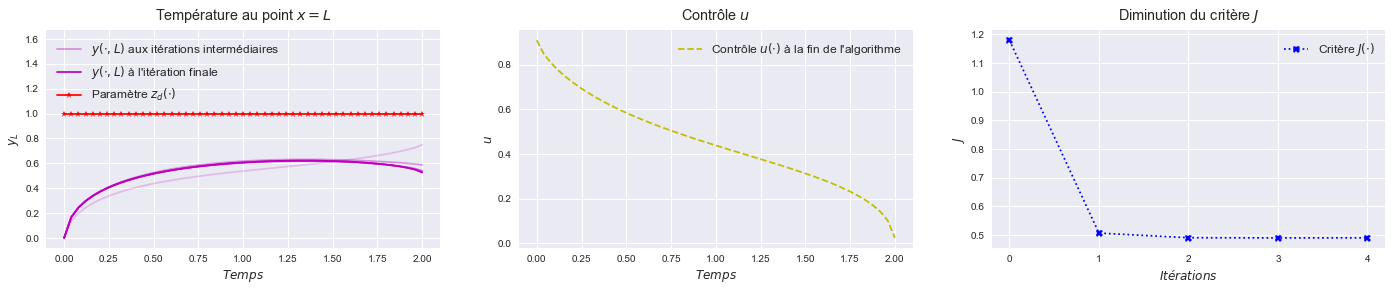

In [184]:
fig,ax = plt.subplots(1,3,figsize=(8*3,4))

Nt = gradientDescentParams["Nt"]
T = gradientDescentParams["T"]
t = np.linspace(0, T, Nt+1)

zd = gradientDescentParams["zd"]

plotStateL(t, yLvals, zd, ax[0])
plotControl(t, u, ax[1])
plotCriteria(Jvals, ax[2])

## 5. Test de l'algorithme

Nous testerons notre algorithme pour diverses valeurs de $\varepsilon$, $T$ et $z_d$. Tous les autres paramètres seront communs à tous les tests, en particulier la longueur de la barre $L=5$ et l'initialisation constante $u^0(\cdot) \equiv 1$.

### Testons l'influence de $\varepsilon$

Pour ce test, on fixe $T = 2$ et $z_d(t) = \frac{1}{2} \left( \frac{1}{2} + \exp(t) + \frac{1}{2} \sin(20t) \right)$.


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 



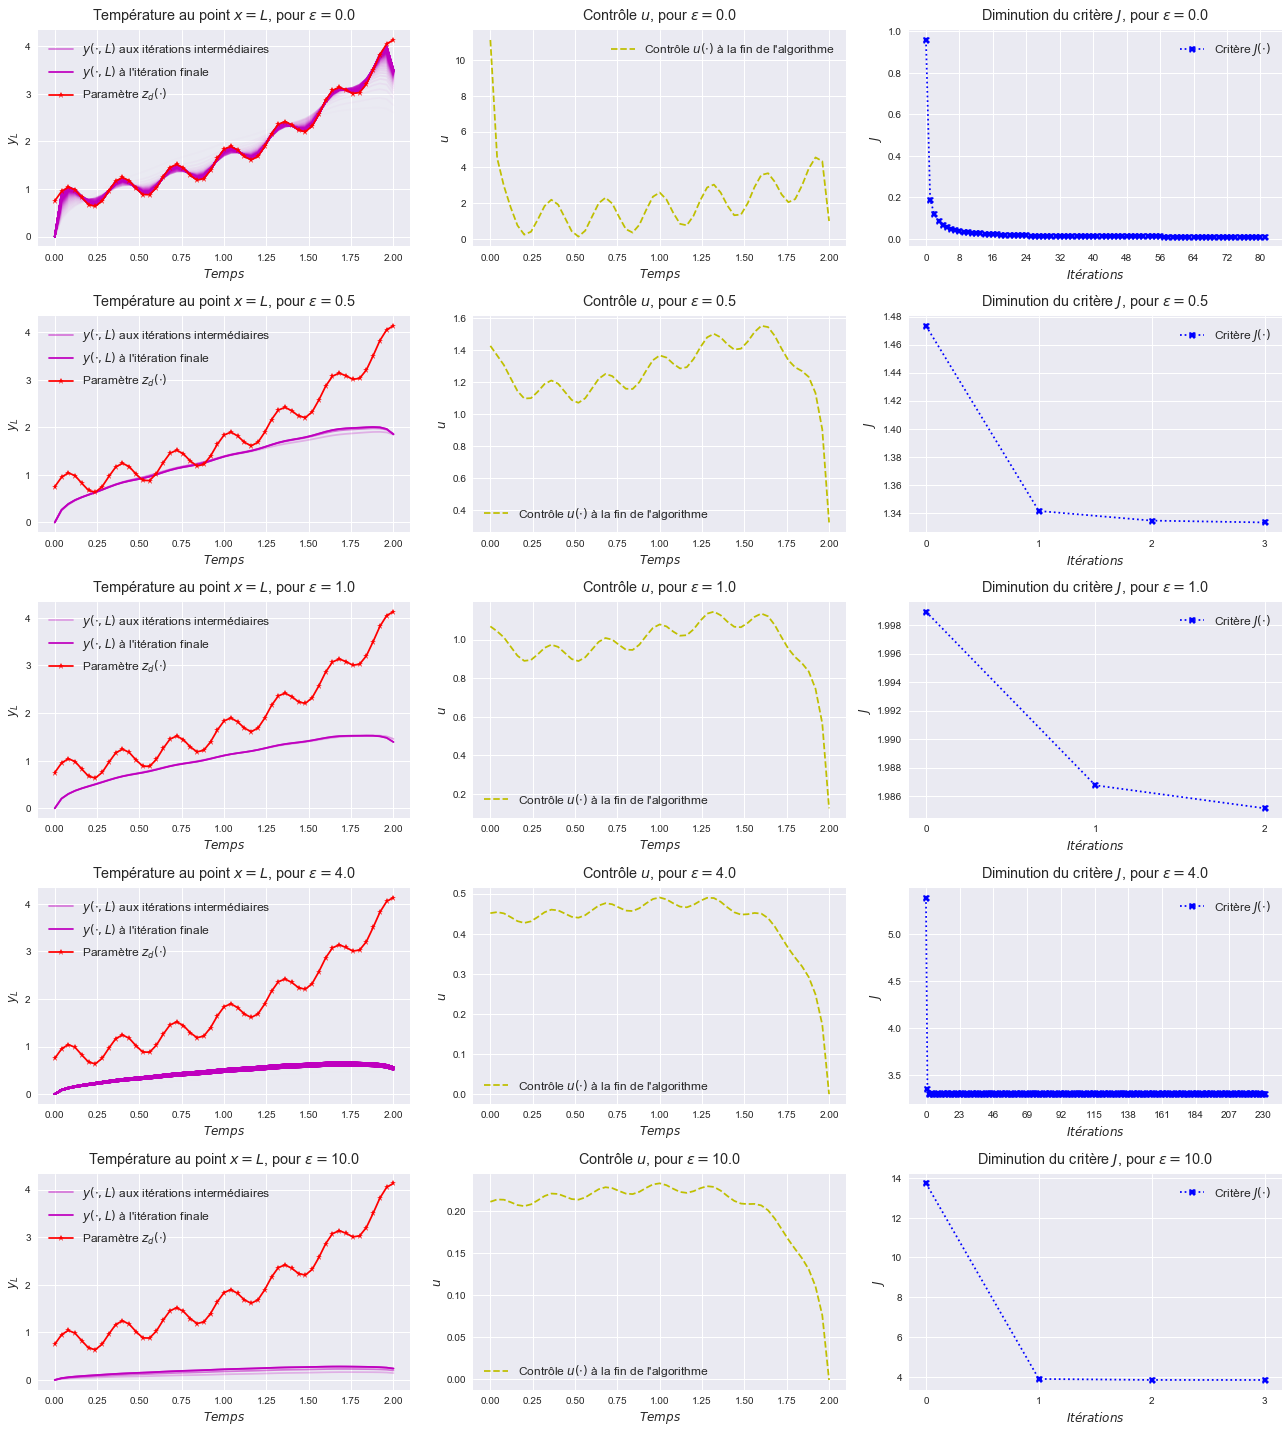

In [198]:
epsilons = [0.0, 0.5, 1, 4, 10]
testParams = gradientDescentParams.copy()
testParams["verbose"] = False

Nt = testParams["Nt"]
T = testParams["T"]
t = np.linspace(0, T, Nt+1)
testParams["zd"] = 0.5*(0.5+np.exp(t)+(0.5*np.sin(20*t)))
zd = testParams["zd"]

fig,ax = plt.subplots(5,3,figsize=(6*3, 4*5))

for i, eps in enumerate(epsilons):
    testParams["eps"] = eps
    yLvals, Jvals, u = gradientDescent(**testParams)

    titleY = "Température au point $x=L$, pour $\\varepsilon=$%0.1f"%eps
    plotStateL(t, yLvals, zd, ax[i, 0], title=titleY)
    titleU = "Contrôle $u$, pour $\\varepsilon=$%0.1f"%eps
    plotControl(t, u, ax[i, 1], title=titleU)
    titleJ = "Diminution du critère $J$, pour $\\varepsilon=$%0.1f"%eps
    plotCriteria(Jvals, ax[i, 2], title=titleJ)

plt.tight_layout();

Les graphiques ci-hauts nous permettent de constater l'influence de $\varepsilon$ sur le critère $J$, et sur la résolution du problème. Il est évident que l'augmentation de $\varepsilon$ permet de limiter la norme $L^2$ du contrôle.

On remarque que lorsque $\varepsilon$ est nul, le problème $(\mathcal{P})$ reviens à porter la température au bord gauche exactement vers le profil $z_d$, ce qui est attendu par les calculs théoriques. Cette précision aux dépens du coût du critère demande considérablement plus d'itérations et de temps de calcul que pour des valeurs de $\varepsilon$ non nulles (plus de 80 itérations pour $\varepsilon = 0$ contre seulement 1 pour $\varepsilon = 1$).

On observe aussi quelques rares difficultés de convergences (par exemple pour $\varepsilon$ = 4 qui nécessite 230 itérations). Plusieurs paramètres peuvent êtres à la cause de cette difficulté, les plus probables étant la valeur maximale du pas de descente $\rho$, l'initialisation $u^0$, le critère d'arrèt, etc.

### Testons l'influence de $T$

Pour ce test, on fixe $\varepsilon = 1$ et $z_d(\cdot) \equiv 1$. 


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 



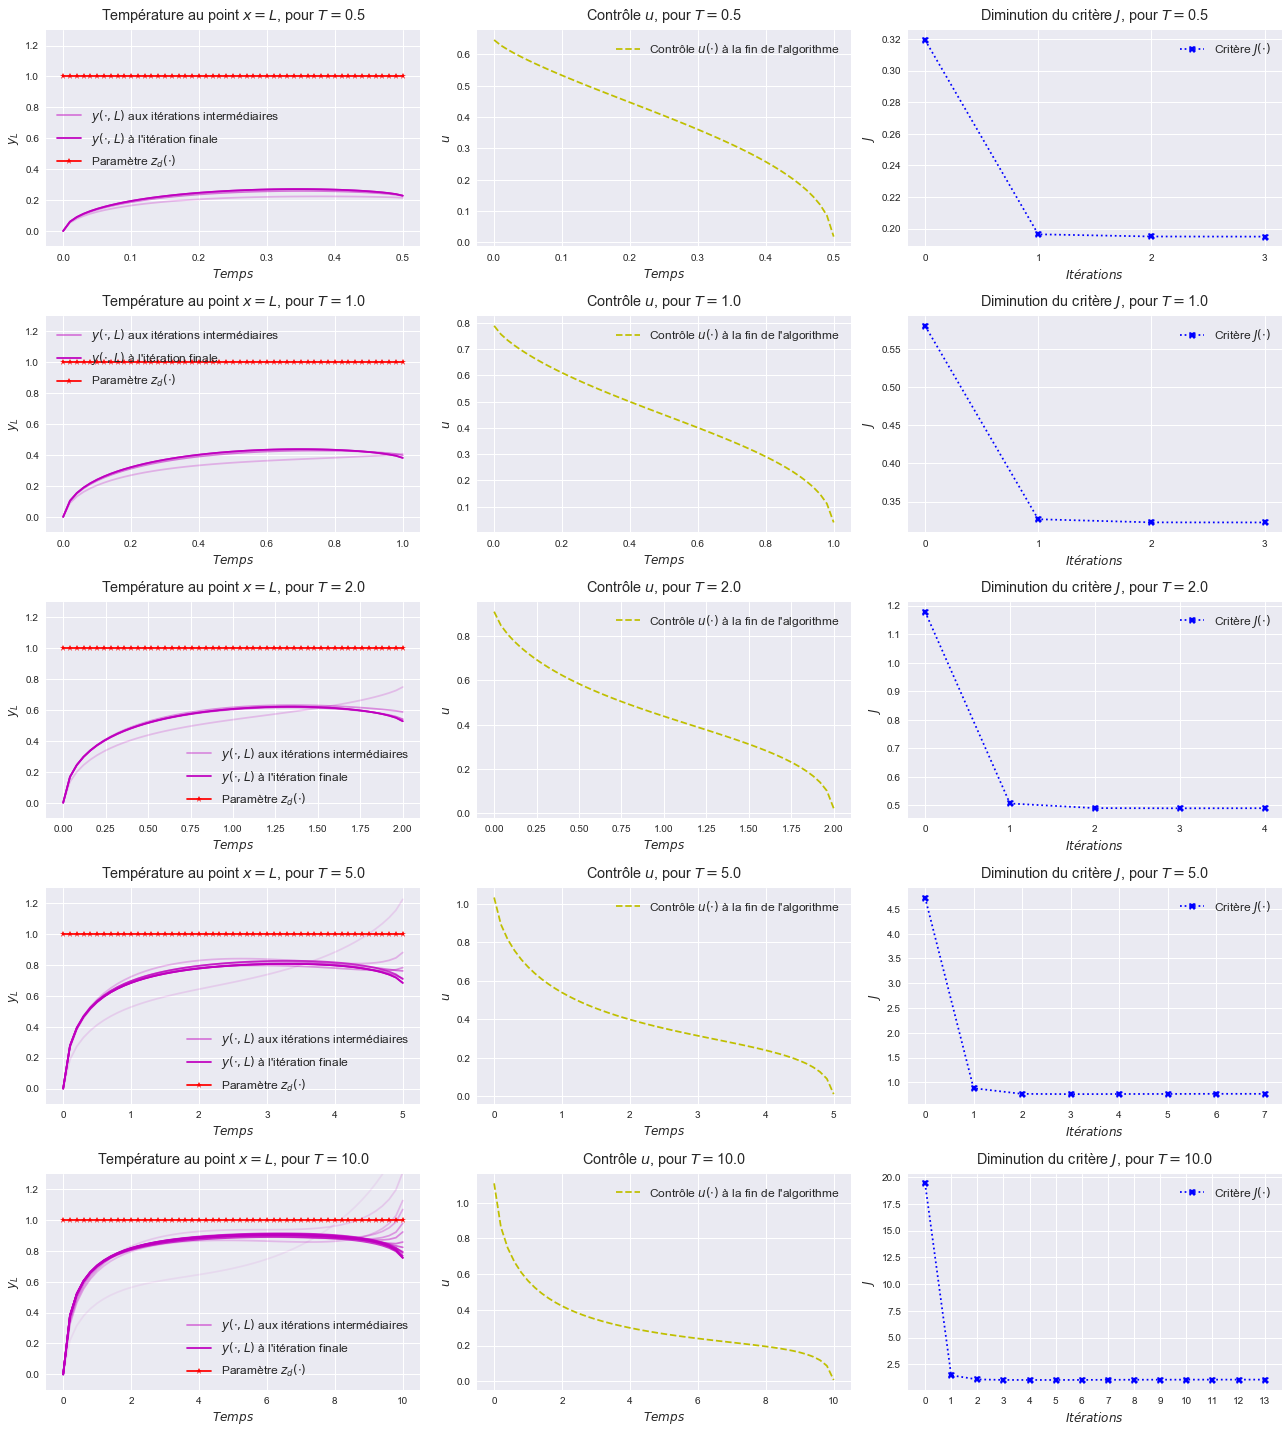

In [188]:
Times = [0.5, 1, 2, 5, 10]
testParams = gradientDescentParams.copy()
testParams["verbose"] = False

Nt = testParams["Nt"]
zd = testParams["zd"]

fig,ax = plt.subplots(5,3,figsize=(6*3, 4*5))

for i, T in enumerate(Times):
    testParams["T"] = T
    yLvals, Jvals, u = gradientDescent(**testParams)

    T = testParams["T"]
    t = np.linspace(0, T, Nt+1)
    titleY = "Température au point $x=L$, pour $T=$%0.1f"%T
    plotStateL(t, yLvals, zd, ax[i, 0], title=titleY, ylim=(-0.1,1.3))
    titleU = "Contrôle $u$, pour $T=$%0.1f"%T
    plotControl(t, u, ax[i, 1], title=titleU)
    titleJ = "Diminution du critère $J$, pour $T=$%0.1f"%T
    plotCriteria(Jvals, ax[i, 2], title=titleJ, ylim=None)

plt.tight_layout();

On observe que l'augmentation du temps de simulation $T$ favorise l'attache aux données à la régularisation (coût du contrôle), demandant plus d'itérations. Intuitivement, ce résultat signifie qu'il est plus facile de contrôler la température de ce système si on a plus de temps, ce qui est conforme à la réalité.

Ce résultat est aussi intéressant car pour une même taille de discrétisation en temps ($N_t = 50$), le problème $(\mathcal{P})$ est plus coûteux à résoudre si l'on rajoute le temps de l'expérience. Et cette augmentation du nombre d'itérations produit tout de même un critère plus important (dû au cout du contrôle qui augmente). Ceci est probablement dû au pas de temps $\Delta t$ qui augmente, donnant des approximations des solutions obtenues par différence finies qui sont moins précises.

### Testons l'influence de $z_d(\cdot)$

Pour ce dernier test, nous prenons $T=2$ et une valeur de $\varepsilon$ suffisament faible ($\varepsilon = 0.01$) afin de mettre une priorité sur l'attache à la donnée $z_d$ dont on voudrait étudier l'impact.


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 


------------------ Gradient descent ongoing ... ------------------------- 



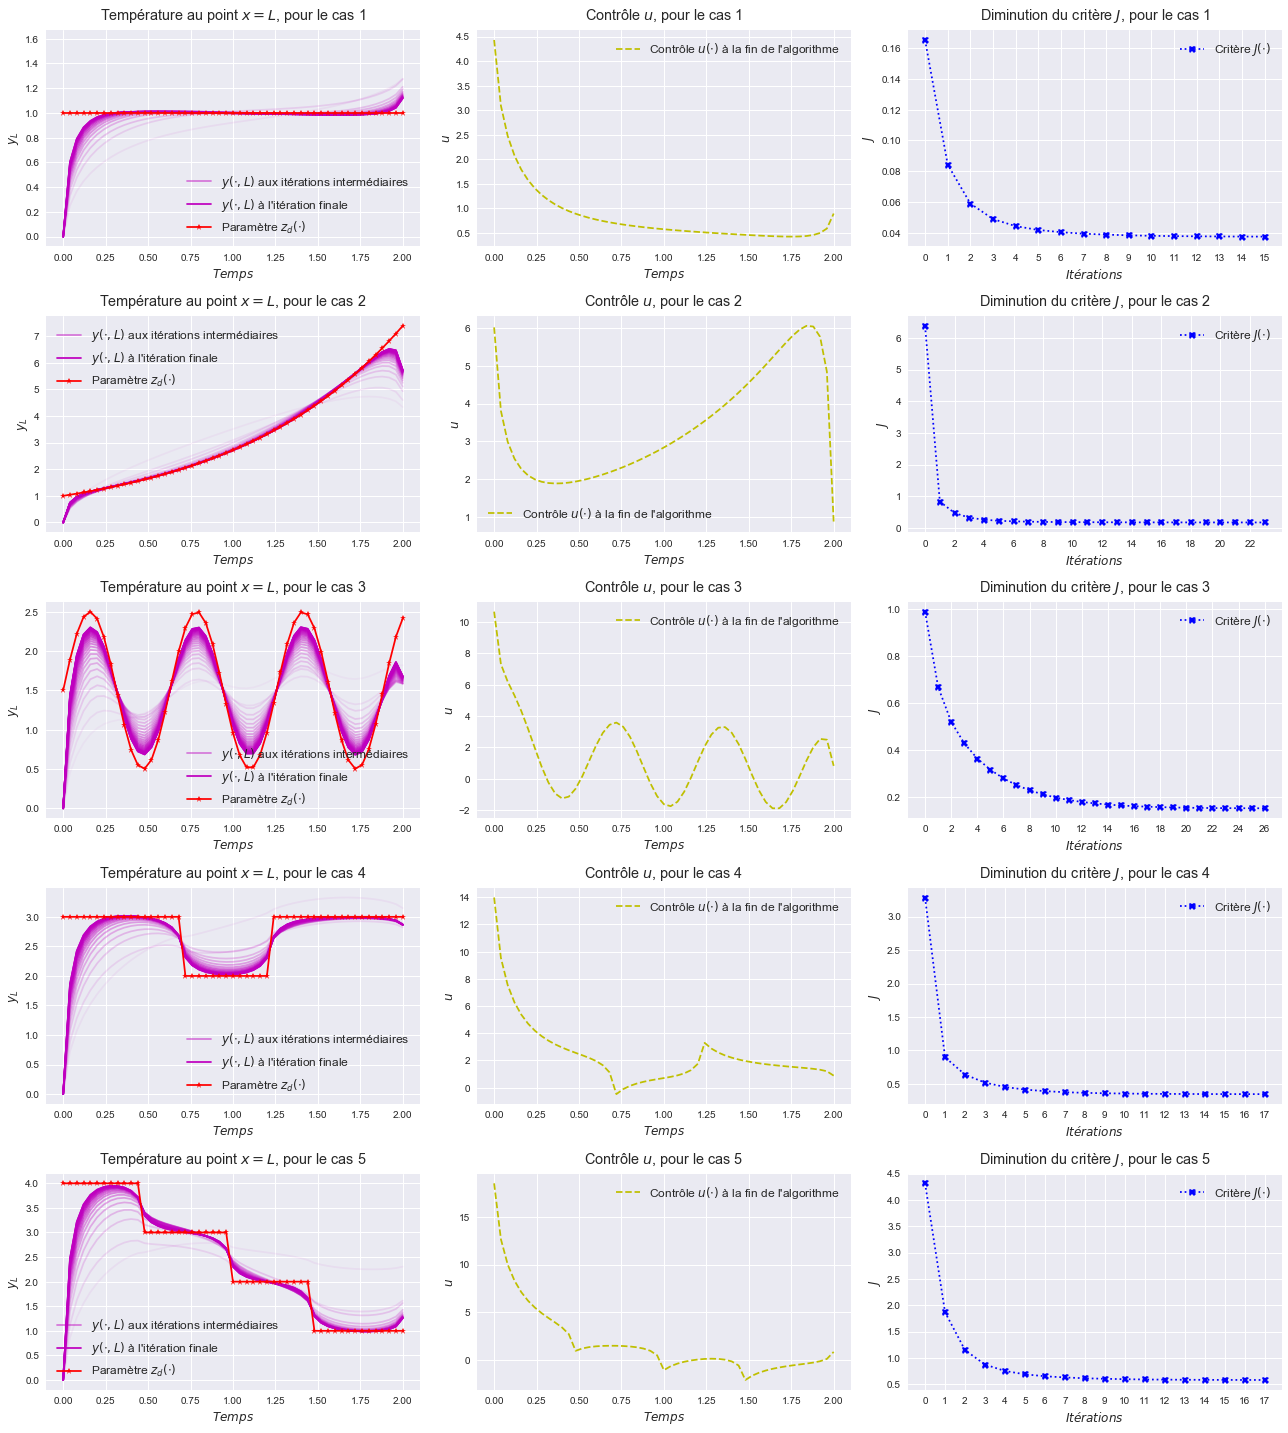

In [178]:
testParams = gradientDescentParams.copy()
testParams["verbose"] = False
testParams["eps"] = 0.01

Nt = testParams["Nt"]
T = testParams["T"]
t = np.linspace(0, T, Nt+1)

fig,ax = plt.subplots(5,3,figsize=(6*3, 4*5))

for i in range(1,6):
    if i in [1]:
        zd = i*np.ones((Nt+1))
    elif i in [2]:
        zd = np.exp(t)
    elif i in [3]:
        zd = 1.5+np.sin(10*t)
    elif i in [4]:
        zd = (i-1)*np.ones((Nt+1))
        zd[3*Nt//8:5*Nt//8] = 2
    elif i in [5]:
        zd = 4*np.ones((Nt+1))
        zd[Nt//4:Nt//2] = 3
        zd[Nt//2:3*Nt//4] = 2
        zd[3*Nt//4:] = 1

    testParams["zd"] = zd
    yLvals, Jvals, u = gradientDescent(**testParams)

    titleY = "Température au point $x=L$, pour le cas %d"%(i)
    plotStateL(t, yLvals, zd, ax[i-1, 0], title=titleY)
    titleU = "Contrôle $u$, pour le cas %d"%(i)
    plotControl(t, u, ax[i-1, 1], title=titleU)
    titleJ = "Diminution du critère $J$, pour le cas %d"%(i)
    plotCriteria(Jvals, ax[i-1, 2], title=titleJ)

plt.tight_layout();

On constate que le modèle réussit assez facilement à retrouver le profil demandé $z_d$, autant pour des profils continus comme pour des profils discontinues. Ceci indique que le choix d'un profil par rapport à un autre n'a pas d'impact majeur sur la résolution du système. 

On note que le choix de $\varepsilon = 0$ (non représenté ici) fournit une attache parfaite à $z_d$, peu importe le profil, comme nous l'avons montré lors du test sur la variation de $\varepsilon$.